In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import ruptures as rpt

In [25]:
df = pd.read_csv('data/groningen_test.csv')
df

,DEPT,DENS,DEN,DT,SON,FLGR,GR,CALI,CAL,RESD,RES_DEP,WELLNAME,target
0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,AMR-1,NaN
1,0.5,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,AMR-1,NaN
2,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,AMR-1,NaN
3,1.5,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,AMR-1,NaN
4,2.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,AMR-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620215,3548.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZWD-2A,NaN
1620216,3548.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZWD-2A,NaN
1620217,3549.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZWD-2A,NaN
1620218,3549.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZWD-2A,NaN


   DEPT  DENS  DEN  DT  SON  FLGR  GR  CALI  CAL  RESD  RES_DEP WELLNAME  \
0   0.0   NaN  NaN NaN  NaN   0.0 NaN   NaN  NaN   NaN      NaN    AMR-1   
1   0.5   NaN  NaN NaN  NaN   0.0 NaN   NaN  NaN   NaN      NaN    AMR-1   
2   1.0   NaN  NaN NaN  NaN   0.0 NaN   NaN  NaN   NaN      NaN    AMR-1   
3   1.5   NaN  NaN NaN  NaN   0.0 NaN   NaN  NaN   NaN      NaN    AMR-1   
4   2.0   NaN  NaN NaN  NaN   0.0 NaN   NaN  NaN   NaN      NaN    AMR-1   

  target  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  


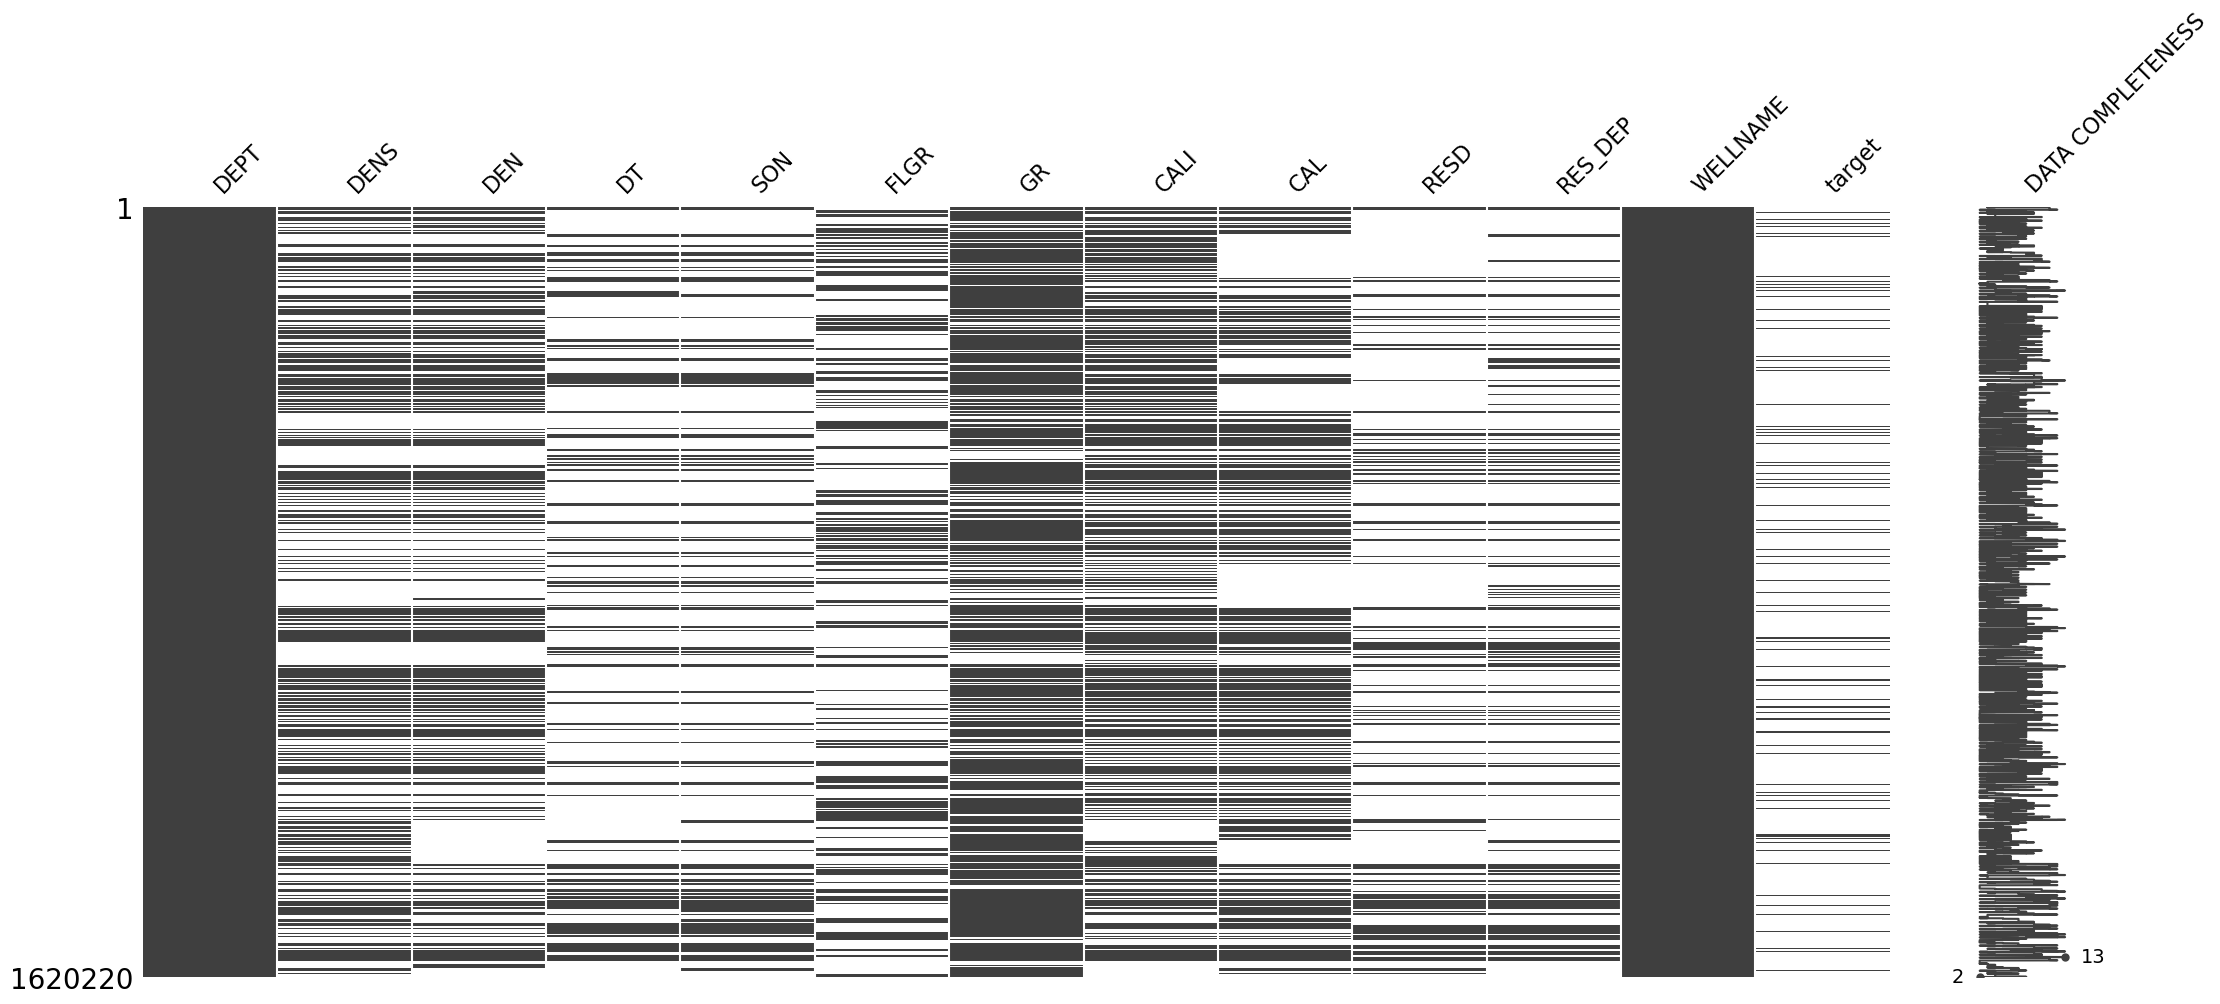

In [3]:
msno.matrix(df, labels=True)
print(df.head())

In [4]:
from sklearn.impute import MissingIndicator

In [5]:
indic = MissingIndicator()
print(np.sum(indic.fit_transform(df)))

11207571


Обнаружены пропущенные ячейки

Разобьём на категориальные признаки и числовые

In [6]:
cat_features = []
num_features = []
for i in range(df.shape[1]):
    if df.dtypes.iloc[i] != "float64":
        cat_features.append(df.columns.tolist()[i])
    else:
        num_features.append(df.columns.tolist()[i])
print(cat_features, num_features)

['WELLNAME', 'target'] ['DEPT', 'DENS', 'DEN', 'DT', 'SON', 'FLGR', 'GR', 'CALI', 'CAL', 'RESD', 'RES_DEP']


Разделим датафрейм на категориальный и числовой

In [7]:
df_cat = df.loc[:, cat_features]
df_num = df.loc[:, num_features]

Заполним пропущенные ячейки с помощью IterativeImputer класса, 
который моделирует каждую функцию с пропущенными значениями в зависимости от других функций 
и использует эту оценку для восстановления. Хотя можно было бы просто заполнить... Нулями?

In [8]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [9]:
imp = IterativeImputer(estimator=LinearRegression(), missing_values=np.nan, max_iter=10, random_state=0)
df_num_without_missing = imp.fit_transform(df_num)

In [10]:
print(df_num_without_missing)

[[ 0.00000000e+00  1.84497213e+00  3.93063610e+00 ...  1.40836293e+01
   1.66202338e+03  1.88176161e+03]
 [ 5.00000000e-01  1.84503748e+00  3.92942150e+00 ...  1.40831304e+01
   1.66203634e+03  1.88171837e+03]
 [ 1.00000000e+00  1.84510283e+00  3.92820690e+00 ...  1.40826315e+01
   1.66204930e+03  1.88167512e+03]
 ...
 [ 3.54900000e+03  2.31477884e+00 -4.42767325e+00 ...  1.02648754e+01
   1.73715699e+03  1.50490006e+03]
 [ 3.54950000e+03  2.31484506e+00 -4.42888846e+00 ...  1.02643765e+01
   1.73717525e+03  1.50488572e+03]
 [ 3.55000000e+03  2.31491127e+00 -4.43010366e+00 ...  1.02638776e+01
   1.73719350e+03  1.50487138e+03]]


In [11]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df_num = enc.fit_transform(df_num_without_missing)
dict_num = [str(key) for key in num_features]#{key: 'cat'+str(key) for key in cat_features}
df_num = pd.DataFrame(df_num, columns=dict_num)
df_num

,DEPT,DENS,DEN,DT,SON,FLGR,GR,CALI,CAL,RESD,RES_DEP
0,0.0,72635.0,1148655.0,1197079.0,715916.0,105125.0,727863.0,967934.0,1033188.0,628527.0,1258744.0
1,1.0,72702.0,1148549.0,1196927.0,716034.0,105125.0,727921.0,967915.0,1033176.0,628588.0,1258739.0
2,2.0,72765.0,1148452.0,1196806.0,716177.0,105125.0,727969.0,967895.0,1033161.0,628659.0,1258727.0
3,3.0,72839.0,1148353.0,1196656.0,716307.0,105125.0,728026.0,967885.0,1033151.0,628727.0,1258723.0
4,4.0,72899.0,1148251.0,1196508.0,716430.0,105125.0,728073.0,967875.0,1033138.0,628806.0,1258716.0
...,...,...,...,...,...,...,...,...,...,...,...
1620215,543642.0,954212.0,36696.0,276764.0,1102149.0,160335.0,938126.0,208747.0,293482.0,1256050.0,640844.0
1620216,543647.0,954260.0,36690.0,276745.0,1102208.0,160273.0,938137.0,208612.0,293326.0,1256081.0,640825.0
1620217,543652.0,954304.0,36682.0,276718.0,1102270.0,160232.0,938147.0,208469.0,293183.0,1256108.0,640800.0
1620218,543657.0,954345.0,36673.0,276693.0,1102319.0,160173.0,938158.0,208314.0,293065.0,1256143.0,640760.0


In [12]:
# df = pd.concat([df_num, df_cat], axis=1)
# df

,DEPT,DENS,DEN,DT,SON,FLGR,GR,CALI,CAL,RESD,RES_DEP,WELLNAME,target
0,0.0,72635.0,1148655.0,1197079.0,715916.0,105125.0,727863.0,967934.0,1033188.0,628527.0,1258744.0,AMR-1,NaN
1,1.0,72702.0,1148549.0,1196927.0,716034.0,105125.0,727921.0,967915.0,1033176.0,628588.0,1258739.0,AMR-1,NaN
2,2.0,72765.0,1148452.0,1196806.0,716177.0,105125.0,727969.0,967895.0,1033161.0,628659.0,1258727.0,AMR-1,NaN
3,3.0,72839.0,1148353.0,1196656.0,716307.0,105125.0,728026.0,967885.0,1033151.0,628727.0,1258723.0,AMR-1,NaN
4,4.0,72899.0,1148251.0,1196508.0,716430.0,105125.0,728073.0,967875.0,1033138.0,628806.0,1258716.0,AMR-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620215,543642.0,954212.0,36696.0,276764.0,1102149.0,160335.0,938126.0,208747.0,293482.0,1256050.0,640844.0,ZWD-2A,NaN
1620216,543647.0,954260.0,36690.0,276745.0,1102208.0,160273.0,938137.0,208612.0,293326.0,1256081.0,640825.0,ZWD-2A,NaN
1620217,543652.0,954304.0,36682.0,276718.0,1102270.0,160232.0,938147.0,208469.0,293183.0,1256108.0,640800.0,ZWD-2A,NaN
1620218,543657.0,954345.0,36673.0,276693.0,1102319.0,160173.0,938158.0,208314.0,293065.0,1256143.0,640760.0,ZWD-2A,NaN


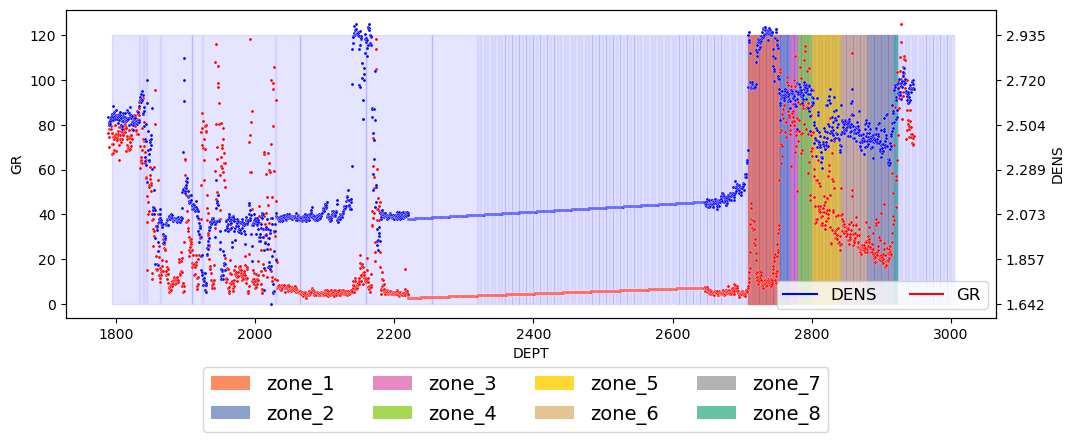

In [56]:
import ruptures as rpt

fig, axn = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 4))

well = df[df.WELLNAME == 'EKL-2']
for i in range(len(well.target.unique())):
    if well.target.unique()[i] is not None:
        start_depth = well[well.target == well.target.unique()[i]]['DEPT'].min()
        end_depth = well[well.target == well.target.unique()[i]]['DEPT'].max()
        axn.fill_between(
            [start_depth, end_depth], [0,0], [120,120],
            color = sns.color_palette('Set2', 9)[i]
        )

        
        

well1 = pd.concat([well["DENS"], well["GR"]])

signal = np.array(well1)
algo = rpt.Pelt(model="l2").fit(signal)
result = algo.predict(pen=0.05)


for seg_start, seg_end in zip(result[:-1], result[1:]):
    if seg_start < 1700 or seg_start > 3000:
        continue
    axn.fill_between(range(seg_start, seg_end), 0, 120, color='blue', alpha=0.1)



axn.set(xlabel = None)

ax1 = axn.twinx()
sns.scatterplot(
    data=df[df.WELLNAME == 'EKL-2'], x='DEPT', y='GR',ax=axn, color='red', s=5   
)
sns.scatterplot(
    data=df[df.WELLNAME == 'EKL-2'], x='DEPT', y='DENS', ax=ax1, color='blue', s=5
)

ylim1 = axn.get_ylim()
len1 = ylim1[1]-ylim1[0]
yticks1 = axn.get_yticks()
rel_dist = [(y-ylim1[0])/len1 for y in yticks1]
ylim2 = ax1.get_ylim()
len2 = ylim2[1]-ylim2[0]
yticks2 = [ry*len2+ylim2[0] for ry in rel_dist]

ax1.set_yticks(yticks2)
ax1.set_ylim(ylim2)

axn.legend(handles=[
    Line2D([], [], marker='', color='blue', label='DENS'),
    Line2D([], [], marker='', color='red', label='GR')
], fontsize = 12, ncol = 2)



legend_elements = [Patch(facecolor = sns.color_palette('Set2', 9)[i], label = f'zone_{i}') for i in range(len(well.target.unique()))]

fig.legend(handles = legend_elements[1:], loc ='lower center', fontsize = 14,
            bbox_to_anchor = (0, -0.2, 1, 1) ,ncol = 4)

(<Figure size 1000x200 with 1 Axes>, [<Axes: >])

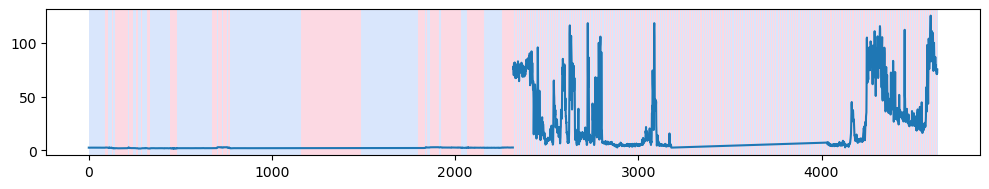

In [57]:
rpt.display(signal, result)